# Laptop Fiyat Tahmini İçin Regresyon Algoritmaları Karşılaştırması  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy import stats

In [2]:
df = pd.read_csv("/Users/asude/Desktop/Yapay Zeka/ödev2/Laptop_dataset.txt")
df.sample(5)


,Marka,İşlemci Tipi,Ram (GB),SSD kapasitesi (GB),Ekran Boyutu (inç),Cihaz Ağırlığı,İşlemci Çekirdek Sayısı,İşlemci Nesli,Dokunmatik Ekran,Ekran Yenileme Hızı (Hz),İşlemci Sınıfı,Marka Sınıfı,Cihaz Ağırlığı Sınıfı,Fiyat
40,ASUS,Intel Core i5,16,512.0,15.6,2 - 4 kg,6,11,0,144,9,1,0,22499.00
65,HP,AMD Ryzen 5,8,512.0,16.1,2 - 4 kg,6,5,0,144,4,7,0,23600.00
230,ACER,AMD Ryzen 7,32,1024.0,17.3,2 - 4 kg,8,5,0,360,5,0,0,44549.01
253,ASUS,Intel Celeron,8,256.0,15.6,2 kg ve Altı,2,5,0,60,7,1,1,7649.00
137,ASUS,AMD Ryzen 7,16,512.0,15.6,2 - 4 kg,8,7,0,144,5,1,0,42126.71


In [3]:
df = df.drop(["Marka","İşlemci Tipi","Cihaz Ağırlığı"], axis=1)
## Datasette geçen Marka, İşlemci Tipi, Cihaz Ağırlığı gibi numerik olmayan verileri Label Encoder kullanılarak
## preprocessing aşamasında Marka Sınıfı, İşlemci Sınıfı ve Cihaz Ağırlığı Sınıfına dönüştürüldü. Bu sebeple bir üst
## satırda droplama işlemi gerçekleştirildi.

In [4]:
df.sample(5)

,Ram (GB),SSD kapasitesi (GB),Ekran Boyutu (inç),İşlemci Çekirdek Sayısı,İşlemci Nesli,Dokunmatik Ekran,Ekran Yenileme Hızı (Hz),İşlemci Sınıfı,Marka Sınıfı,Cihaz Ağırlığı Sınıfı,Fiyat
107,16,500.0,15.6,10,12,0,144,10,4,0,28099.0
139,64,2048.0,17.0,14,12,0,60,10,6,0,105949.0
20,32,1024.0,15.6,10,12,0,144,10,4,0,27999.0
252,16,512.0,15.6,14,12,0,144,10,1,0,24994.0
57,16,512.0,15.6,8,7,0,144,5,1,0,32999.0


## Kullanılan Modeller

In [5]:
modelLR=LinearRegression()
modelDT= DecisionTreeRegressor(random_state=42)
modelRF=modelRF=RandomForestRegressor(random_state=42)
modelSVM=SVR(kernel='linear')
modelKNN=KNeighborsRegressor(n_neighbors=3)

# 10 Katlı Çapraz Geçerleme ile Verinin Yalın Hali Üzerinde Model Karşılaştırması

In [6]:
## Bu kısımda özellikler ve hedef ayrıldı. Verisetindeki fiyat değişkeni hedef olarak belirlenirken kalan tüm değişkenler
## X'e dahil edildi.
X = df.drop("Fiyat", axis=1)
y = df["Fiyat"]

In [7]:
## Veri seti 10 parçaya bölündüğü için split sayısı 10 olarak belirlendi.
kFold = KFold(n_splits = 10)

## Modellerin df ile test edilmesi

In [8]:
averageCVScores={}

In [9]:
scoresLR = cross_val_score(modelLR, X, y, cv=kFold)
print("Cross Validation Scores for Linear Regression: ", scoresLR)
print("Average CV Score for Linear Regression: ", scoresLR.mean())
averageCVScores["LR"]=scoresLR.mean()

Cross Validation Scores for Linear Regression:  [0.81228154 0.80869459 0.50032894 0.53491974 0.57622937 0.40195344
 0.77868336 0.45194604 0.59548574 0.59716384]
Average CV Score for Linear Regression:  0.6057686586058929


In [10]:
scoresDT = cross_val_score(modelDT, X, y, cv = kFold)
print("Cross Validation Scores for Desicion Tree: ", scoresDT)
print("Average CV Score for Desicion Tree: ", scoresDT.mean())
averageCVScores["DT"]=scoresDT.mean()

Cross Validation Scores for Desicion Tree:  [ 0.62146181  0.4687252   0.10637265  0.56908227 -0.23364097  0.51260196
  0.58133749 -0.00943962  0.38170243  0.39296911]
Average CV Score for Desicion Tree:  0.3391172348325977


In [11]:
scoresRF = cross_val_score(modelRF, X, y, cv = kFold)
print("Cross Validation Scores for Random Forest: ", scoresRF)
print("Average CV Score for Random Forest: ", scoresRF.mean())
averageCVScores["RF"]=scoresRF.mean()

Cross Validation Scores for Random Forest:  [0.73385315 0.77185326 0.46556484 0.76459944 0.5495548  0.6733805
 0.75257524 0.50857969 0.77420595 0.72849687]
Average CV Score for Random Forest:  0.6722663740490191


In [12]:
scoresSVM = cross_val_score(modelSVM, X, y, cv=kFold)
print("Cross Validation Scores for SVM: ", scoresSVM)
print("Average CV Score for SVM: ", scoresSVM.mean())
averageCVScores["SVM"]=scoresSVM.mean()

Cross Validation Scores for SVM:  [0.67389817 0.70575193 0.40998549 0.49692327 0.4881665  0.42090586
 0.74140608 0.34457325 0.62583382 0.47295523]
Average CV Score for SVM:  0.5380399599367639


In [13]:
scoresKNN = cross_val_score(modelKNN, X, y, cv=kFold)
print("Cross Validation Scores for KNN: ", scoresKNN)
print("Average CV Score for KNN: ", scoresKNN.mean())
averageCVScores["KNN"]=scoresKNN.mean()

Cross Validation Scores for KNN:  [ 0.64945494  0.69494095  0.20784559  0.65676156  0.68847101  0.47234493
  0.77365909 -0.47832917  0.6209006   0.56114714]
Average CV Score for KNN:  0.4847196638564559


In [14]:
averageCVScores

{'LR': 0.6057686586058929,
 'DT': 0.3391172348325977,
 'RF': 0.6722663740490191,
 'SVM': 0.5380399599367639,
 'KNN': 0.4847196638564559}

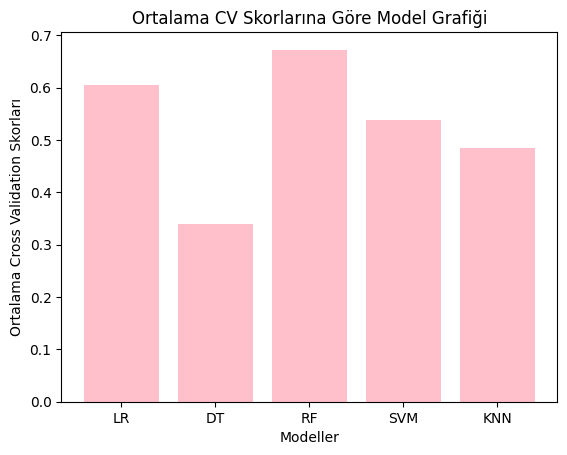

In [15]:
keys = list(averageCVScores.keys())
values = list(averageCVScores.values())
plt.bar(keys, values,color='pink')
plt.xlabel('Modeller')
plt.ylabel('Ortalama Cross Validation Skorları')
plt.title('Ortalama CV Skorlarına Göre Model Grafiği')
plt.show()

## T-Test 

In [16]:
scores = [scoresLR, scoresDT, scoresRF, scoresSVM, scoresKNN]
models=["LR","DT","RF","SVM","KNN"]
alpha = 0.05  ##anlamlılık düzeyi

for i in range(len(models)):
    for j in range(i+1, len(models)):
        model1 = scores[i]
        model2 = scores[j]

        ##t-test işlemi
        t_statistic, p_value = stats.ttest_ind(model1, model2)

        if p_value < alpha:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark vardır.")
        else:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark yoktur.")

LR ve DT arasında istatistiksel olarak anlamlı bir fark vardır.
LR ve RF arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve RF arasında istatistiksel olarak anlamlı bir fark vardır.
DT ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
RF ve SVM arasında istatistiksel olarak anlamlı bir fark vardır.
RF ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
SVM ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.


# 10 Katlı Çapraz Geçerleme ile Verinin Normalize Edilmiş Hali Üzerinde Model Karşılaştırması

## Normalizasyon işlemi

In [17]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_norm=df_norm.drop("Fiyat", axis=1)
y_norm = df_norm["Fiyat"]

## Modellerin normalize edilmiş df ile test edilmesi

In [18]:
NormAverageCVScores={}

In [19]:
scoresLR = cross_val_score(modelLR, X_norm, y_norm, cv=kFold)
print("Cross Validation Scores for Linear Regression with Normalisation: ", scoresLR)
print("Average CV Score for Linear Regression with Normalisation: ", scoresLR.mean())
NormAverageCVScores["LR"]=scoresLR.mean()

Cross Validation Scores for Linear Regression with Normalisation:  [0.81228154 0.80869459 0.50032894 0.53491974 0.57622937 0.40195344
 0.77868336 0.45194604 0.59548574 0.59716384]
Average CV Score for Linear Regression with Normalisation:  0.6057686586058926


In [20]:
scoresDT = cross_val_score(modelDT, X_norm, y_norm, cv = kFold)
print("Cross Validation Scores for Desicion Tree with Normalisation: ", scoresDT)
print("Average CV Score for Desicion Tree with Normalisation: ", scoresDT.mean())
NormAverageCVScores["DT"]=scoresDT.mean()

Cross Validation Scores for Desicion Tree with Normalisation:  [ 0.59129603  0.41866244  0.15366882  0.63794136 -0.3393076   0.49441049
  0.58142331 -0.11034312  0.50058898  0.39296911]
Average CV Score for Desicion Tree with Normalisation:  0.33213098194098556


In [21]:
scoresRF = cross_val_score(modelRF, X_norm, y_norm, cv = kFold)
print("Cross Validation Scores for Random Forest with Normalisation: ", scoresRF)
print("Average CV Score for Random Forest with Normalisation: ", scoresRF.mean())
NormAverageCVScores["RF"]=scoresRF.mean()

Cross Validation Scores for Random Forest with Normalisation:  [0.72733418 0.77566283 0.4668567  0.76129294 0.53251222 0.6706547
 0.74700076 0.5051063  0.78793649 0.72805895]
Average CV Score for Random Forest with Normalisation:  0.6702416066062409


In [22]:
scoresSVM = cross_val_score(modelSVM, X_norm, y_norm, cv=kFold)
print("Cross Validation Scores for SVM with Normalisation: ", scoresSVM)
print("Average CV Score for SVM with Normalisation: ", scoresSVM.mean())
NormAverageCVScores["SVM"]=scoresSVM.mean()

Cross Validation Scores for SVM with Normalisation:  [0.7591583  0.74115223 0.51340141 0.49048065 0.57380084 0.45604852
 0.78618424 0.36213411 0.62041945 0.54462416]
Average CV Score for SVM with Normalisation:  0.5847403909629534


In [23]:
scoresKNN = cross_val_score(modelKNN, X_norm, y_norm, cv=kFold)
print("Cross Validation Scores for KNN with Normalisation: ", scoresKNN)
print("Average CV Score for KNN with Normalisation: ", scoresKNN.mean())
NormAverageCVScores["KNN"]=scoresKNN.mean()

Cross Validation Scores for KNN with Normalisation:  [0.30807011 0.70193735 0.32082976 0.39342654 0.03493561 0.72703175
 0.83036598 0.67208733 0.69403289 0.66694191]
Average CV Score for KNN with Normalisation:  0.5349659230887136


In [24]:
NormAverageCVScores

{'LR': 0.6057686586058926,
 'DT': 0.33213098194098556,
 'RF': 0.6702416066062409,
 'SVM': 0.5847403909629534,
 'KNN': 0.5349659230887136}

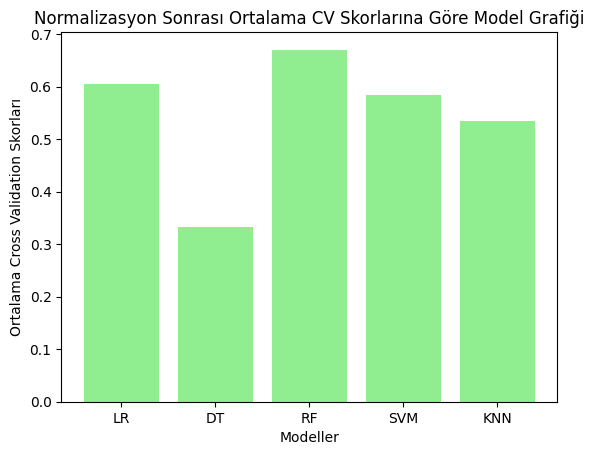

In [25]:
keys = list(NormAverageCVScores.keys())
values = list(NormAverageCVScores.values())
plt.bar(keys, values,color='lightgreen')
plt.xlabel('Modeller')
plt.ylabel('Ortalama Cross Validation Skorları')
plt.title('Normalizasyon Sonrası Ortalama CV Skorlarına Göre Model Grafiği')
plt.show()

## T-Test 

In [26]:
scores = [scoresLR, scoresDT, scoresRF, scoresSVM, scoresKNN]
models=["LR","DT","RF","SVM","KNN"]
alpha = 0.05  ##anlamlılık düzeyi

for i in range(len(models)):
    for j in range(i+1, len(models)):
        model1 = scores[i]
        model2 = scores[j]

        ##t-test işlemi
        t_statistic, p_value = stats.ttest_ind(model1, model2)

        if p_value < alpha:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark vardır.")
        else:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark yoktur.")

LR ve DT arasında istatistiksel olarak anlamlı bir fark vardır.
LR ve RF arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve RF arasında istatistiksel olarak anlamlı bir fark vardır.
DT ve SVM arasında istatistiksel olarak anlamlı bir fark vardır.
DT ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
RF ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
RF ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
SVM ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.


# 10 Katlı Çapraz Geçerleme ile Verinin Principal Component Analysis (PCA) İşleminden Geçmiş Hali Üzerinde Model Karşılaştırması

## PCA Modelinin Oluşturulması

In [27]:
## Bu kısımda 5 adet komponent seçildi.
pca = PCA(n_components=5)
## Veriseti standartlaştırıldı.
X_std = (X - X.mean()) / X.std()
## Veriseti üzerinde pca uygulandı.
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca)

## Modellerin PCA işleminden geçmiş df ile test edilmesi

In [28]:
PcaAverageCVScores={}

In [29]:
scoresLR = cross_val_score(modelLR, X_pca,y, cv=kFold)
print("Cross Validation Scores for Linear Regression with PCA: ", scoresLR)
print("Average CV Score for Linear Regression with PCA: ", scoresLR.mean())
PcaAverageCVScores["LR"]=scoresLR.mean()

Cross Validation Scores for Linear Regression with PCA:  [0.76848092 0.73182315 0.29888735 0.48307585 0.58999034 0.62066102
 0.74396575 0.57439201 0.43791831 0.53797398]
Average CV Score for Linear Regression with PCA:  0.578716868627826


In [30]:
scoresDT = cross_val_score(modelDT, X_pca, y, cv=kFold)
print("Cross Validation Scores for Desicion Tree with PCA: ", scoresDT)
print("Average CV Score for Desicion Tree with PCA: ", scoresDT.mean())
PcaAverageCVScores["DT"]=scoresDT.mean()

Cross Validation Scores for Desicion Tree with PCA:  [ 0.19876797  0.77813416  0.01371143  0.30528276  0.27846892  0.36774159
  0.88514644  0.18692805  0.32279252 -0.740881  ]
Average CV Score for Desicion Tree with PCA:  0.2596092842891671


In [31]:
scoresRF = cross_val_score(modelRF, X_pca, y, cv = kFold)
print("Cross Validation Scores for Random Forest with PCA: ", scoresRF)
print("Average CV Score for Random Forest with PCA: ", scoresRF.mean())
PcaAverageCVScores["RF"]=scoresRF.mean()

Cross Validation Scores for Random Forest with PCA:  [0.53139091 0.68130154 0.24243623 0.4788714  0.52735177 0.59423197
 0.88630688 0.45291707 0.71912103 0.54518401]
Average CV Score for Random Forest with PCA:  0.5659112814739439


In [32]:
##SVM modeli diğer modellerin aksine kendi içinde standartlaştırma yapmamaktadır. Bu yüzden skor negatif çıkmaktadır.
## Modelin diğer modellerle doğru karşılaştırılabilmesi için y değeri dışarıda standartlaştırılmış 
##ve modele öyle verilmiştir.

y_std = (y - y.mean()) / y.std()
scoresSVM = cross_val_score(modelSVM, X_pca, y_std, cv=kFold)
print("Cross Validation Scores for SVM with PCA: ", scoresSVM)
print("Average CV Score for SVM with PCA: ", scoresSVM.mean())
PcaAverageCVScores["SVM"]=scoresSVM.mean()

Cross Validation Scores for SVM with PCA:  [0.73146448 0.64024832 0.32378581 0.4662638  0.49306634 0.61383001
 0.73862756 0.6433713  0.57620973 0.5965224 ]
Average CV Score for SVM with PCA:  0.5823389740583812


In [33]:
scoresKNN = cross_val_score(modelKNN, X_pca, y, cv=kFold)
print("Cross Validation Scores for KNN with PCA: ", scoresKNN)
print("Average CV Score for KNN with PCA: ", scoresKNN.mean())
PcaAverageCVScores["KNN"]=scoresKNN.mean()

Cross Validation Scores for KNN with PCA:  [0.39536236 0.61770068 0.27291934 0.50391171 0.28434827 0.65564033
 0.90313357 0.21029312 0.6636195  0.65285819]
Average CV Score for KNN with PCA:  0.5159787080485578


In [34]:
PcaAverageCVScores

{'LR': 0.578716868627826,
 'DT': 0.2596092842891671,
 'RF': 0.5659112814739439,
 'SVM': 0.5823389740583812,
 'KNN': 0.5159787080485578}

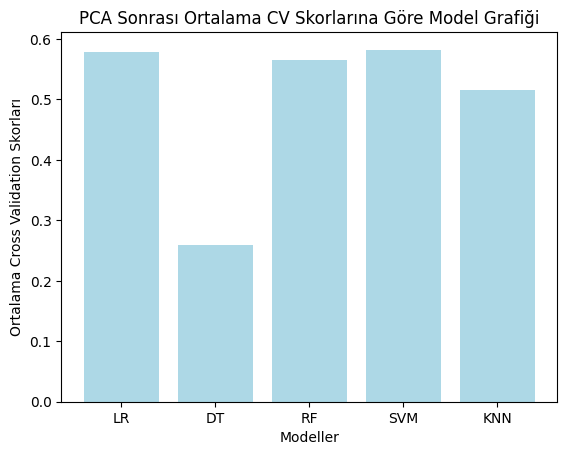

In [35]:
keys = list(PcaAverageCVScores.keys())
values = list(PcaAverageCVScores.values())
plt.bar(keys, values,color='lightblue')
plt.xlabel('Modeller')
plt.ylabel('Ortalama Cross Validation Skorları')
plt.title('PCA Sonrası Ortalama CV Skorlarına Göre Model Grafiği')
plt.show()

## T-Test 

In [36]:
scores = [scoresLR, scoresDT, scoresRF, scoresSVM, scoresKNN]
models=["LR","DT","RF","SVM","KNN"]
alpha = 0.05  ##anlamlılık düzeyi

for i in range(len(models)):
    for j in range(i+1, len(models)):
        model1 = scores[i]
        model2 = scores[j]

        ##t-test işlemi
        t_statistic, p_value = stats.ttest_ind(model1, model2)

        if p_value < alpha:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark vardır.")
        else:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark yoktur.")

LR ve DT arasında istatistiksel olarak anlamlı bir fark vardır.
LR ve RF arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve RF arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve SVM arasında istatistiksel olarak anlamlı bir fark vardır.
DT ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
RF ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
RF ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
SVM ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.


# 10 Katlı Çapraz Geçerleme ile Verinin Özellik Seçimi İşleminden Geçmiş Hali Üzerinde Model Karşılaştırması

## Seçilecek Özelliklerin Belirlenmesi

In [37]:
correlationMatrix = df.corr()

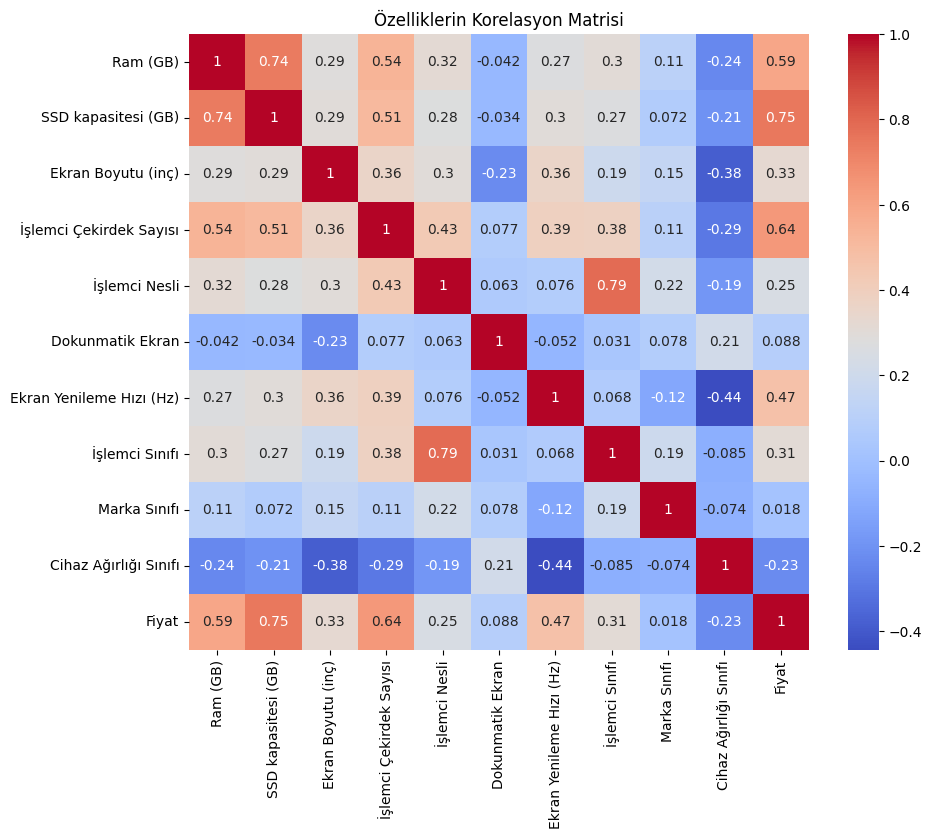

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title('Özelliklerin Korelasyon Matrisi')
plt.show()

In [39]:
sortedPriceCorelationValues = correlationMatrix[['Fiyat']].abs().sort_values(by='Fiyat', ascending=False)

In [40]:
sortedPriceCorelationValues

,Fiyat
Fiyat,1.000000
SSD kapasitesi (GB),0.751135
İşlemci Çekirdek Sayısı,0.643387
Ram (GB),0.590317
Ekran Yenileme Hızı (Hz),0.474905
Ekran Boyutu (inç),0.325040
İşlemci Sınıfı,0.307876
İşlemci Nesli,0.246359
Cihaz Ağırlığı Sınıfı,0.226046
Dokunmatik Ekran,0.087897


In [41]:
## Sıralanmış değerler arasından değeri 0.5'ten büyük olan özellikler bestFeatures olarak seçildi.
## Bu sayede veri setininden fiyatın değişimi üzerine en çok etkisi olan özellikler belirlenmiş oldu.
bestFeatures = sortedPriceCorelationValues[sortedPriceCorelationValues['Fiyat'] > 0.5]
bestFeatures

,Fiyat
Fiyat,1.000000
SSD kapasitesi (GB),0.751135
İşlemci Çekirdek Sayısı,0.643387
Ram (GB),0.590317


In [42]:
## sadece en iyi özelliklerin olduğu sütunların seçilme işlemi
X_fs = df[bestFeatures.index].drop("Fiyat",axis=1)
## y üzerinde bir değişiklik yapılmadığından y_fs değişkeni yoktur.

## Modellerin özellik seçimi sonucu oluşan alt küme ile test edilmesi

In [43]:
FsAverageCVScores={} 

In [44]:
scoresLR = cross_val_score(modelLR, X_fs,y, cv=kFold)
print("Cross Validation Scores for Linear Regression with Feature Selection: ", scoresLR)
print("Average CV Score for Linear Regression with Feature Selection: ", scoresLR.mean())
FsAverageCVScores["LR"]=scoresLR.mean()

Cross Validation Scores for Linear Regression with Feature Selection:  [0.72926691 0.78314621 0.46960663 0.34397522 0.52395991 0.50539608
 0.761794   0.01303657 0.44785215 0.56512785]
Average CV Score for Linear Regression with Feature Selection:  0.5143161528263454


In [45]:
scoresDT = cross_val_score(modelDT, X_fs, y, cv=kFold)
print("Cross Validation Scores for Desicion Tree with Feature Selection: ", scoresDT)
print("Average CV Score for Desicion Tree with Feature Selection: ", scoresDT.mean())
FsAverageCVScores["DT"]=scoresDT.mean()

Cross Validation Scores for Desicion Tree with Feature Selection:  [ 0.6293724   0.42141331  0.52732811  0.33891058  0.53697961  0.49328557
  0.56489742 -0.40495449  0.21710504  0.1407568 ]
Average CV Score for Desicion Tree with Feature Selection:  0.3465094338565141


In [46]:
scoresRF = cross_val_score(modelRF, X_fs, y, cv = kFold)
print("Cross Validation Scores for Random Forest with Feature Selection: ", scoresRF)
print("Average CV Score for Random Forest with Feature Selection: ", scoresRF.mean())
FsAverageCVScores["RF"]=scoresRF.mean()

Cross Validation Scores for Random Forest with Feature Selection:  [ 0.6716939   0.47061717  0.67679636  0.34415628  0.54850589  0.5758959
  0.56406278 -0.32019908  0.38669409  0.43844714]
Average CV Score for Random Forest with Feature Selection:  0.43566704238678156


In [47]:
scoresSVM = cross_val_score(modelSVM, X_fs, y, cv=kFold)
print("Cross Validation Scores for SVM with Feature Selection: ", scoresSVM)
print("Average CV Score for SVM with Feature Selection: ", scoresSVM.mean())
FsAverageCVScores["SVM"]=scoresSVM.mean()

Cross Validation Scores for SVM with Feature Selection:  [ 0.69239738  0.76323857  0.31886685  0.3938354   0.55389067  0.40690126
  0.72712468 -0.17369718  0.47489264  0.35550404]
Average CV Score for SVM with Feature Selection:  0.4512954311813969


In [48]:
scoresKNN = cross_val_score(modelKNN, X_fs, y, cv=kFold)
print("Cross Validation Scores for KNN with Feature Selection: ", scoresKNN)
print("Average CV Score for KNN with Feature Selection: ", scoresKNN.mean())
FsAverageCVScores["KNN"]=scoresKNN.mean()

Cross Validation Scores for KNN with Feature Selection:  [ 0.68525002  0.62568068  0.54667763  0.35637457  0.38512557  0.34367384
  0.60012937 -0.40675508  0.53641391  0.64335317]
Average CV Score for KNN with Feature Selection:  0.43159236777182


In [49]:
FsAverageCVScores

{'LR': 0.5143161528263454,
 'DT': 0.3465094338565141,
 'RF': 0.43566704238678156,
 'SVM': 0.4512954311813969,
 'KNN': 0.43159236777182}

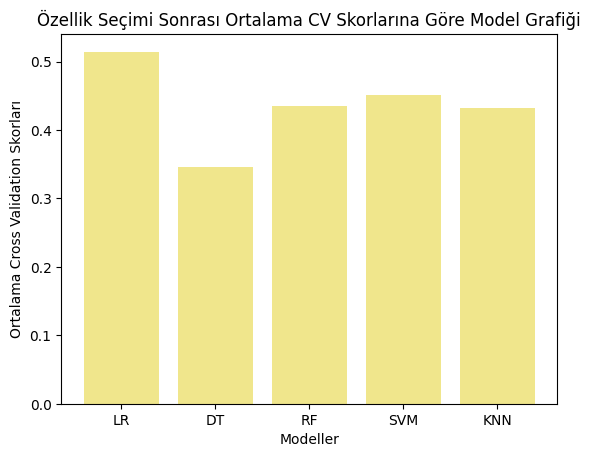

In [50]:
keys = list(FsAverageCVScores.keys())
values = list(FsAverageCVScores.values())
plt.bar(keys, values,color='khaki')
plt.xlabel('Modeller')
plt.ylabel('Ortalama Cross Validation Skorları')
plt.title('Özellik Seçimi Sonrası Ortalama CV Skorlarına Göre Model Grafiği')
plt.show()

## T-Test 

In [51]:
scores = [scoresLR, scoresDT, scoresRF, scoresSVM, scoresKNN]
models=["LR","DT","RF","SVM","KNN"]
alpha = 0.05  ##anlamlılık düzeyi

for i in range(len(models)):
    for j in range(i+1, len(models)):
        model1 = scores[i]
        model2 = scores[j]

        ##t-test işlemi
        t_statistic, p_value = stats.ttest_ind(model1, model2)

        if p_value < alpha:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark vardır.")
        else:
            print(f"{models[i]} ve {models[j]} arasında istatistiksel olarak anlamlı bir fark yoktur.")

LR ve DT arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve RF arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
LR ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve RF arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
DT ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
RF ve SVM arasında istatistiksel olarak anlamlı bir fark yoktur.
RF ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.
SVM ve KNN arasında istatistiksel olarak anlamlı bir fark yoktur.


# Model İçi Karşılaştırmalar

In [52]:
scoreLabels = ["Yalın", "Normalize", "PCA", "Özellik Seçimi"] 

def showModelScores(modelShortCut, color):
    allAverageScores = []
    allAverageScores.append(averageCVScores[modelShortCut])
    allAverageScores.append(NormAverageCVScores[modelShortCut])
    allAverageScores.append(PcaAverageCVScores[modelShortCut])
    allAverageScores.append(FsAverageCVScores[modelShortCut])
    key=scoreLabels
    plt.bar(key, allAverageScores,color=color)
    plt.xlabel('İşlem İsimleri')
    plt.ylabel('Ortalama Cross Validation Skorları')
    plt.title(modelShortCut)
    plt.show()

## Linear Regression

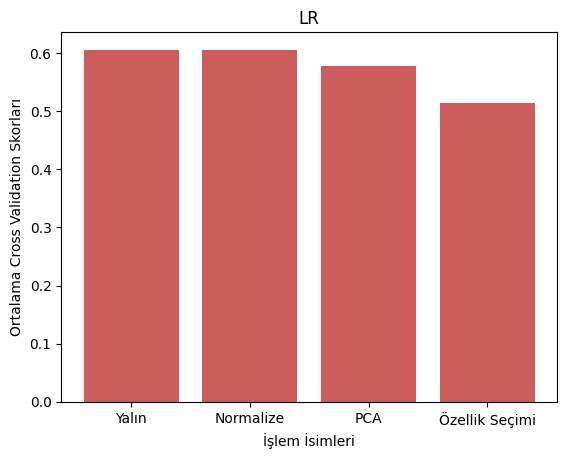

In [53]:
showModelScores('LR', 'indianred')

## Desicion Tree

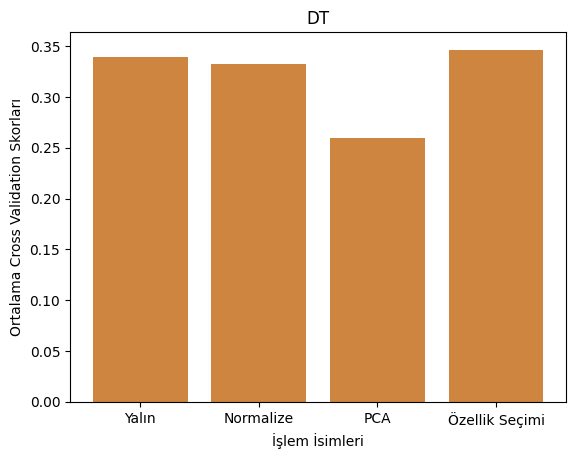

In [54]:
showModelScores('DT', 'peru')

## Random Forest

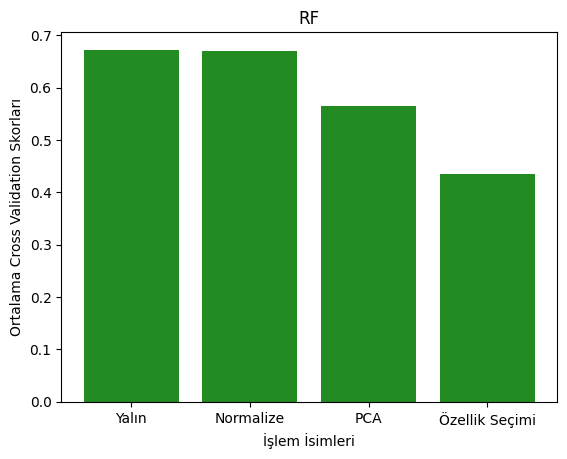

In [55]:
showModelScores('RF', 'forestgreen')

## Support Vector Machine 

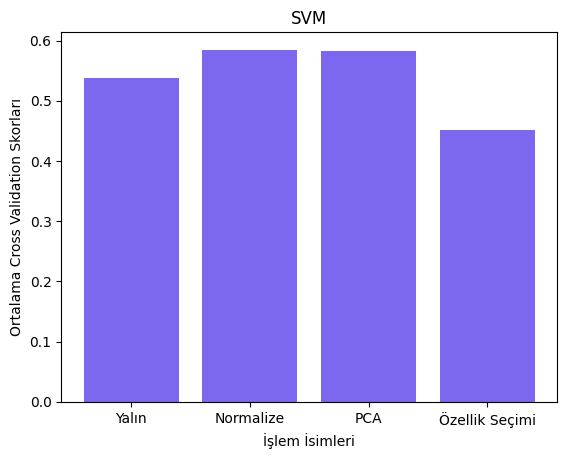

In [56]:
showModelScores('SVM', 'mediumslateblue')

## K Nearest Neighbors

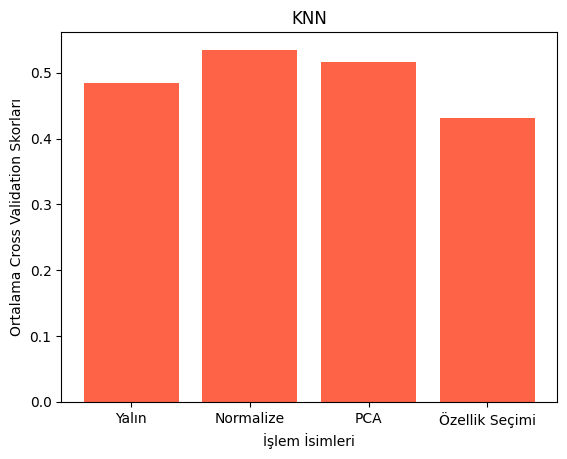

In [57]:
showModelScores('KNN', 'tomato')